In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [33]:
data = pd.read_csv('fraudTest.csv')

In [34]:
print(data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [36]:
print(data.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

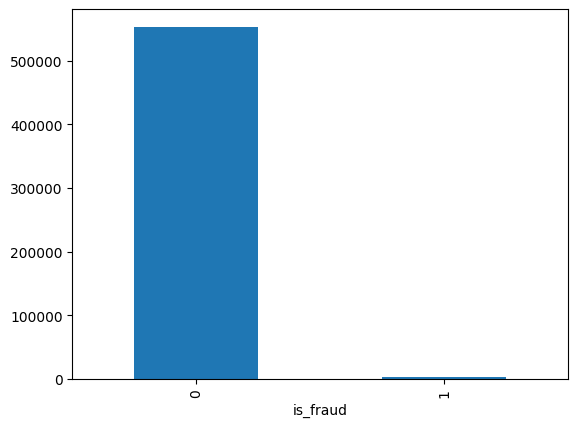

In [37]:
data.groupby("is_fraud")['cc_num'].count().plot(kind="bar")
plt.show()

In [38]:
useless_cols = [
    'Unnamed: 0', 'merchant', 'cc_num', 'first', 'zip', 'last', 'trans_num',
    'unix_time', 'street', 'merch_lat', 'gender', 'merch_long', 'job', 'trans_date_trans_time'
]
data.drop(columns=useless_cols, inplace=True)

In [40]:
import pandas as pd
from datetime import datetime # Import the datetime module

data["dob"] = pd.to_datetime(data["dob"])
data["dob"] = data["dob"].dt.year
data['dob'] = datetime.now().year - data['dob'] # Now datetime is defined
data = data.rename(columns={"dob": "age"})

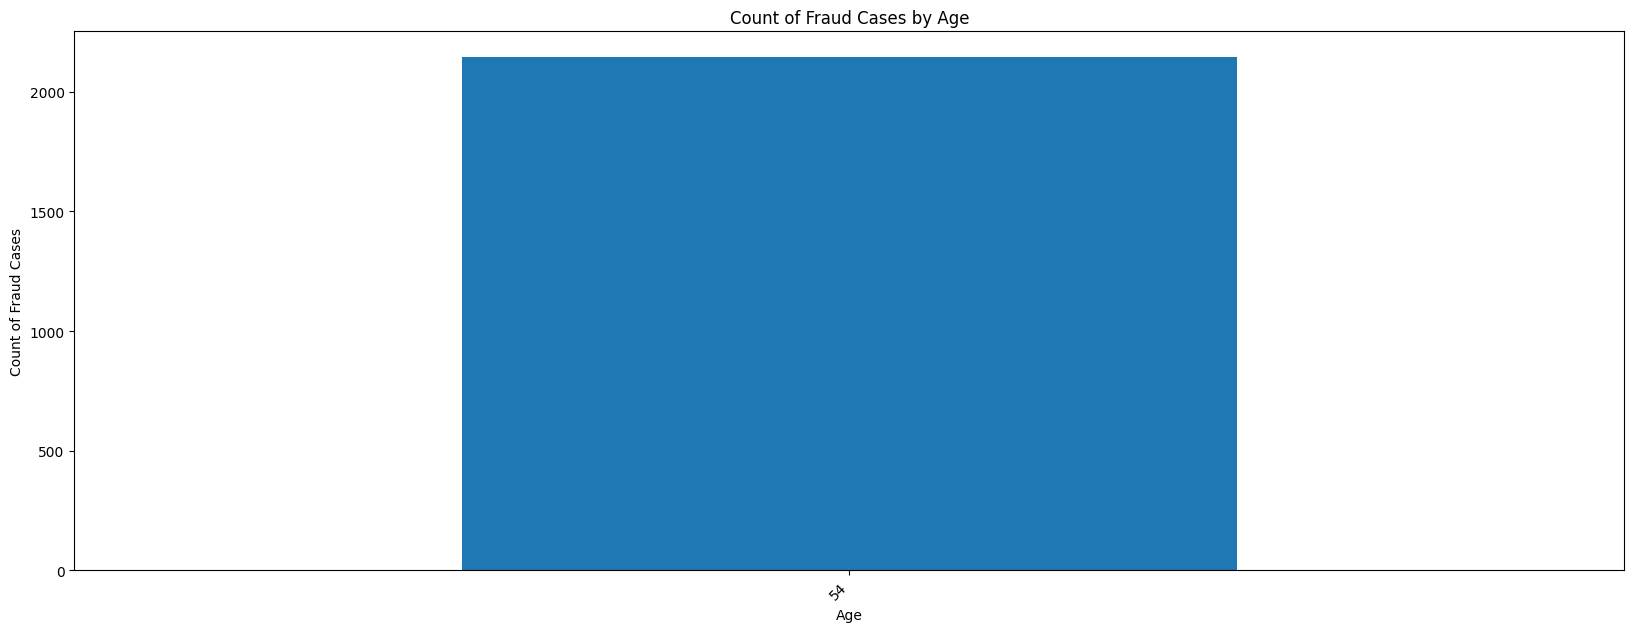

In [41]:
plt.figure(figsize=(20, 7))
ax = data[data['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
numeric_columns = [i for i in data.columns if data[i].dtype in ['int64', 'int32', 'float64']]
categorical_columns = [i for i in data.columns if data[i].dtype == 'object']
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [43]:
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [44]:
columns = data.columns.tolist()
columns.remove('is_fraud')
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

In [45]:
y = y.fillna(y.mode()[0])

In [46]:
X = X.fillna(X.mean())

In [47]:
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [50]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

Model: Logistic Regression
Accuracy: 0.9958
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.8599




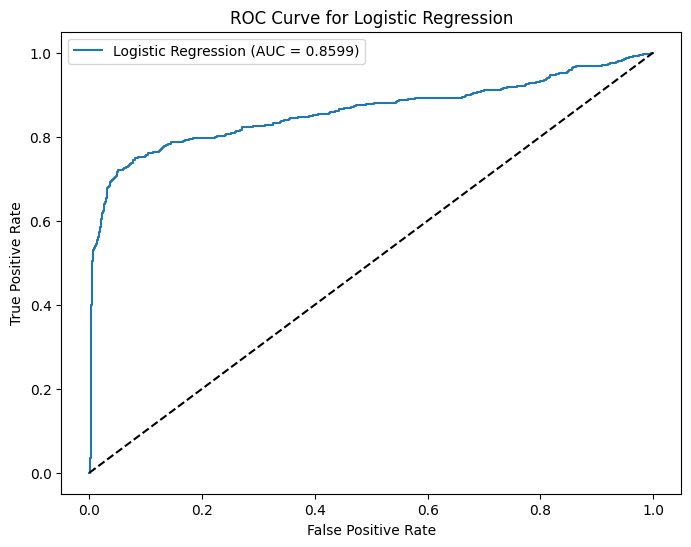

Model: Decision Tree
Accuracy: 0.9968
Precision: 0.5781
Recall: 0.5822
F1 Score: 0.5801
ROC AUC Score: 0.7903




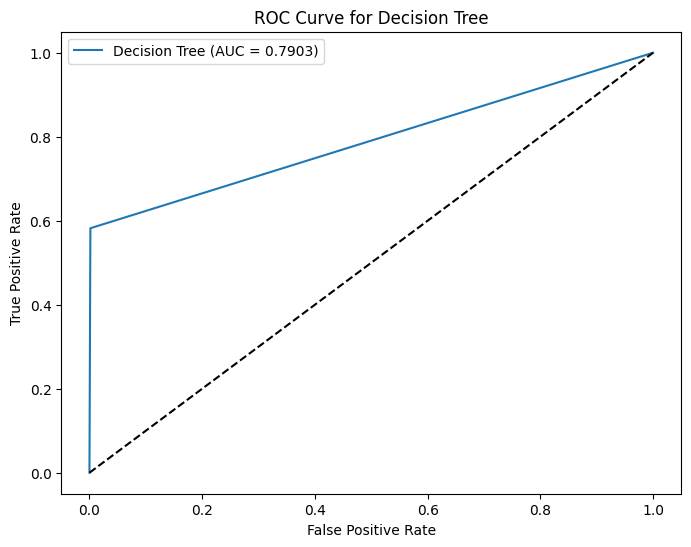

Model: Random Forest
Accuracy: 0.9981
Precision: 0.8454
Recall: 0.6033
F1 Score: 0.7041
ROC AUC Score: 0.9637




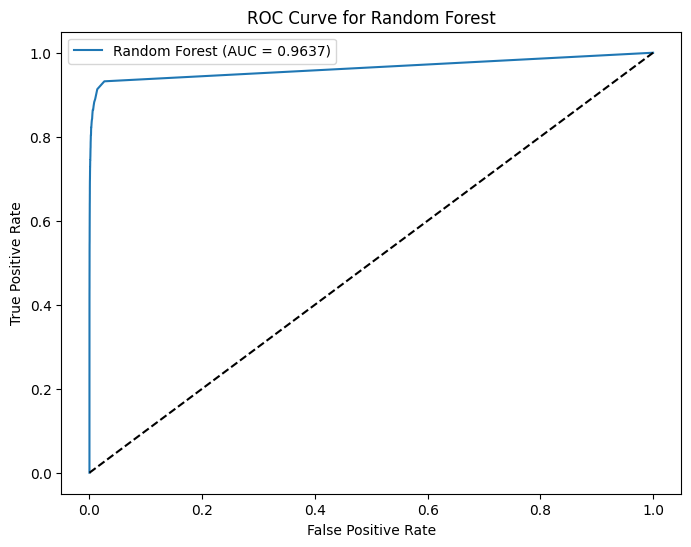

In [51]:
for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\n")

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()